# Find out new buildings via S1 SAR data

Synthetic aperture radar (SAR) images are used to generate maps of surface deformation or digital elevation, using differences in the phase of the waves returning to the satellite.<br> 
The classification of urban areas in terms of land-use/land-cover (LULC) maps is a challenging as well as essential task in order to monitor how the urban sprawl is changing the environment. This trial notebook is dedicated to the visualisation of the built-up area extended near Wuhan, where a new hospital has been built in 10 days during the COVID-19 emergency. To this aim we use the <font color="red"> S1 L1 Ground Range Detected (GRD)</font> products with high resolution (H), sensed before and after the building site in order to detect the environmental changes.

In [1]:
import os, sys
sys.path.append(os.path.join(os.path.expanduser("~"),"CLEOPE/Trials/modules"))
import data_processing_S1 as dp

You can choose to work with local files or using the Advanced API. Functions in this tutorial can manage both choices independently and automatically, but only if product of interest are provided (as a list or a file). <br> 
Please note that products used in this example notebook could be *offline*: use the `order` function in the `qm` module to retrieve them first.
### Using the Advanced API (ENS)
The input list must contain the position of products in the remote file system. Note that this list is automatically provided using the `SEARCH.ipynb` trial notebook, aimed at facilitating the data access via ENS. Products are found via ENS at their pseudopath, accessed and processed in situ, without any local download. <br>
### Using OData API
Load a custom list containing the products downloaded in the `local_files` folder. To do that, use the `download` function in the `qm` module, which will download and save items via your own Jupyter Notebook using OData protocol. Check out `DISCOVER_ONDA.ipynb` for more details. <br>
Downloads are stored in the 📁`local_files` folder. The 📄`list_local.txt` file will be created and updated in this working directory with the new downloaded item, authomatically.

In [2]:
files = dp.open_band(dp.product("S1_list_remote.txt")) # open GRDH images from your list of products

## Clip the image 
✂️ Let's clip the data set defining a tuple of coordinates as input. Be sure to select vertexes **contained** in the image to avoid `NaN`s.

In [3]:
coords = (114.06722222, 30.52527778, 114.095, 30.54) # xmin,ymin,xmax,ymax
dp.wrap(coords,files) # call a gdal script to clip files from list 
# clipped images are put into the clipped_files folder

## Find out differences before and after the build-up!

👉 New buildings show higher backscattering: you can easily detect them in the second and third panels near the centre of the figure ($y_c\sim 30.531;\,x_c\sim 114.083$). The colorbar indicates the [backscattering magnitude](https://earth.esa.int/web/guest/missions/esa-operational-eo-missions/ers/instruments/sar/applications/radar-courses/content-2/-/asset_publisher/qIBc6NYRXfnG/content/radar-course-2-parameters-affecting-radar-backscatter).

### SAR imaging via RGB stack
If more than one SAR images of the same area acquired at different time are available, they can be combined to give a multitemporal colour composite image of the area. For example, if three images are available, then one image can be assigned to the Red, the second to the Green and the third to the Blue colour channels for display. This technique is especially useful in detecting landcover changes over the period of image acquisition. The areas where no change in landcover occurs will appear white/gray (depending on the backscattering magnitude) while areas with landcover changes will appear as colourful patches in the image.

<img src="../../media/S1_rgb.PNG" alt="drawing" width="300"/>

There are 7 combination of colors in total (RGB, RG, RB, GB and R, G, B separately), then classification could be very difficoult in general. In this example we can obtain a SAR RGB stack by setting `rgb=True` into `image` function; major changes took place during the period until the second acquisition (green channel), when the Huoshenshan hospital building has been completed.

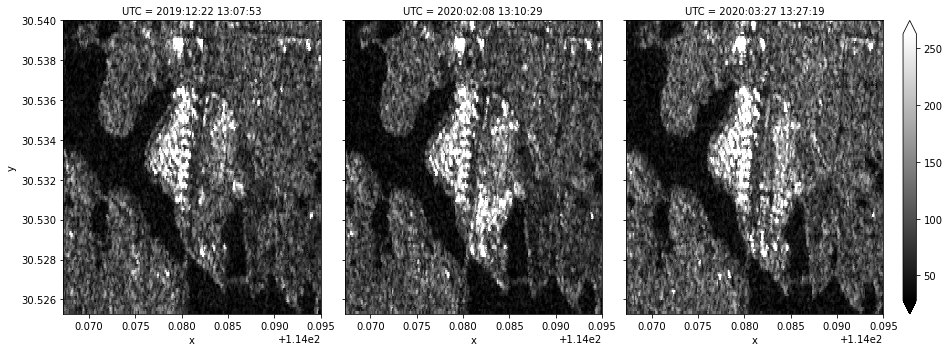

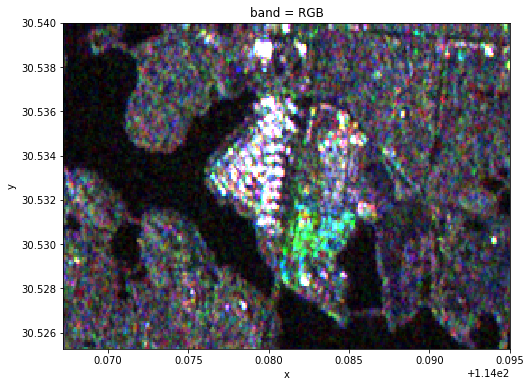

In [4]:
dc = dp.image(rgb=True,figsize=(15,5))